# Spam message detection

## Dataset Loading, Preprocessing, and Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('train_spam.csv')
df

,text_type,text
0,ham,make sure alex knows his birthday is over in f...
1,ham,a resume for john lavorato thanks vince i will...
2,spam,plzz visit my website moviesgodml to get all m...
3,spam,urgent your mobile number has been awarded wit...
4,ham,overview of hr associates analyst project per ...
...,...,...
16273,spam,if you are interested in binary options tradin...
16274,spam,dirty pictureblyk on aircel thanks you for bei...
16275,ham,or you could do this g on mon 1635465 sep 1635...
16276,ham,insta reels par 80 गंद bhara pada hai 👀 kuch b...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16278 entries, 0 to 16277
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text_type  16278 non-null  object
 1   text       16278 non-null  object
dtypes: object(2)
memory usage: 254.5+ KB


In [ ]:
df.shape

(16278, 2)

Так как тип текста - это категориальный признак (spam/ham), то сделаем Label encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['text_type'] = encoder.fit_transform(df['text_type'])
df.head()

,text_type,text
0,0,make sure alex knows his birthday is over in f...
1,0,a resume for john lavorato thanks vince i will...
2,1,plzz visit my website moviesgodml to get all m...
3,1,urgent your mobile number has been awarded wit...
4,0,overview of hr associates analyst project per ...


In [ ]:
df.isnull().sum()

text_type    0
text         0
dtype: int64

Пропущенные значения не были найдены.

Проанализируем распределение типов сообщений.

<Axes: xlabel='text_type'>

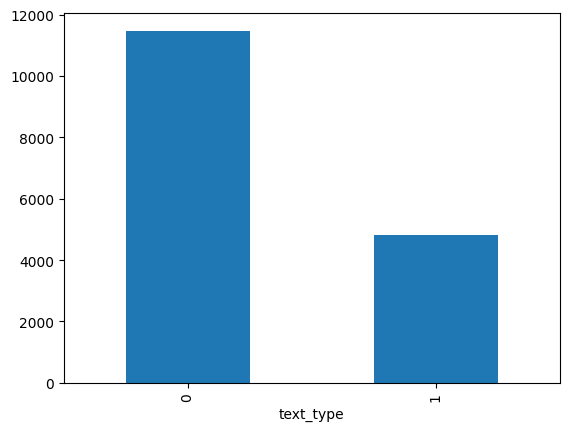

In [ ]:
df['text_type'].value_counts().plot(kind='bar')

([<matplotlib.patches.Wedge at 0x15778ff90>,
 [Text(-0.6592749716470193, 0.8805433048747927, 'ham'),
  Text(0.6592749716470193, -0.8805433048747927, 'spam')],
 [Text(-0.3596045299892832, 0.48029634811352323, '70.5%'),
  Text(0.3596045299892832, -0.48029634811352323, '29.5%')])

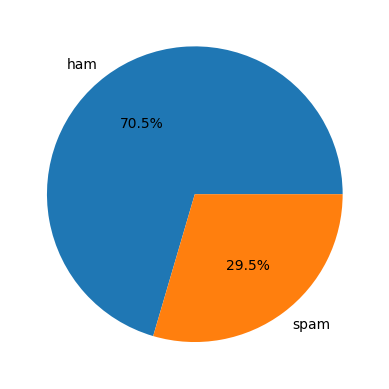

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['text_type'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%')

## Text processing

С помощью nltk обработаем текст следующим образом:

Приведем текст к нижнему регистру.

Разобьем текст на отдельные слова.

Удалим стоп-слова, знаки пунктуации и неалфавитные символы.

Применим стемминг к каждому слову.

Объединим отфильтрованные слова обратно в одну строку.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
import string

def process_text(text):
    text = text.lower()
    words = word_tokenize(text)
    stemmer = PorterStemmer()
    filtered_words = [stemmer.stem(word) for word in words if word.isalnum() and word not in stopwords.words('english') and word not in string.punctuation]
    processed_text = ' '.join(filtered_words)
    return processed_text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/citadel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/citadel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df['processed_text'] = df['text'].apply(process_text)

In [ ]:
for i in range(5):
    print('Original text:', df['text'][i])
    print('Processed text:', df['processed_text'][i])
    print()

Original text: make sure alex knows his birthday is over in fifteen minutes as far as youre concerned
Processed text: make sure alex know birthday fifteen minut far your concern

Original text: a resume for john lavorato thanks vince i will get moving on it right away molly vince j kaminski 02 21 2001 05 55 pm to molly magee hou ect ect cc vince j kaminski hou ect ect subject a resume for john lavorato molly please make arrangements for the interview with this candidate for a trading position interviews with john lavorato jeff shankman gary hickerson stinson gibner i talked to him in new york and he is considering other opportunities so we have to act fast i think john will like him more than punit thanks
Processed text: resum john lavorato thank vinc get move right away molli vinc j kaminski 02 21 2001 05 55 pm molli mage hou ect ect cc vinc j kaminski hou ect ect subject resum john lavorato molli pleas make arrang interview candid trade posit interview john lavorato jeff shankman gar

Рассмотрим облака слова для спам и обычных сообщений.

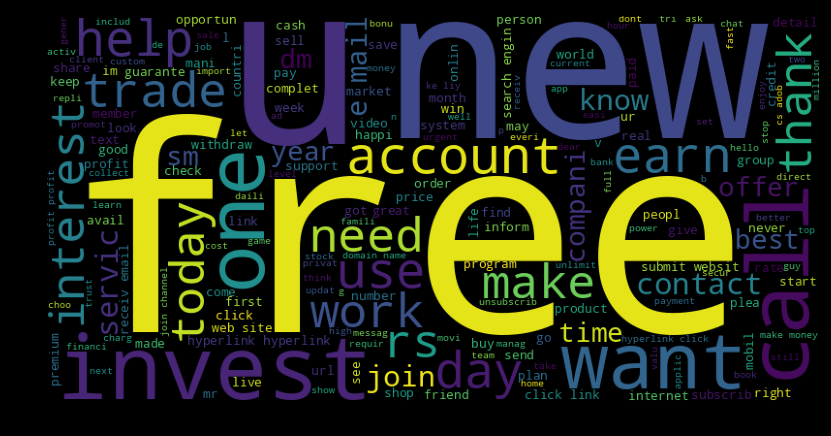

In [ ]:
from wordcloud import WordCloud
spam_wordcloud = WordCloud(width=800, height=400).generate(' '.join(df[df['text_type'] == 1]['processed_text']))
plt.figure(figsize=(10, 8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.show()


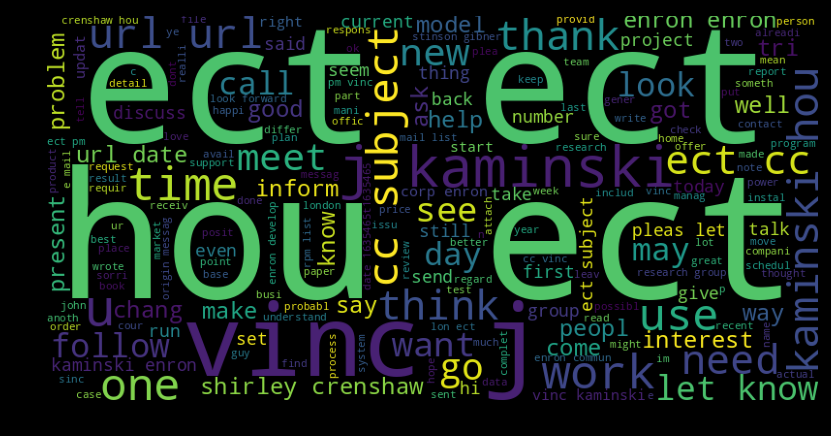

In [ ]:
ham_wordcloud = WordCloud(width=800, height=400).generate(' '.join(df[df['text_type'] == 0]['processed_text']))
plt.figure(figsize=(10, 8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.show()

## Model Building

Обучим модели классического машинного обучения для классификации сообщений на спам и обычные. В качестве способа векторизации будем использовать TF-IDF.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfifdf = TfidfVectorizer(max_features=5000)

X = tfifdf.fit_transform(df['processed_text']).toarray()
y = df['text_type'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


In [ ]:
svc = SVC(kernel='sigmoid')
knn = KNeighborsClassifier()
lr = LogisticRegression(solver='liblinear', penalty='l1')
rf = RandomForestClassifier(n_estimators=50)
ab = AdaBoostClassifier(n_estimators=50)
et = ExtraTreesClassifier(n_estimators=50)
xgb = XGBClassifier(n_estimators=50)
lgbm = LGBMClassifier(n_estimators=50)
cb = CatBoostClassifier(n_estimators=50, verbose=0)
mnb = MultinomialNB()

In [ ]:
clfs = {
    'SVC': svc,
    'KNN': knn,
    'LR': lr,
    'RF': rf,
    'AB': ab,
    'ET': et,
    'XGB': xgb,
    'LGBM': lgbm,
    'CB': cb,
    'MNB': mnb
}

In [ ]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [ ]:
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

for name, clf in clfs.items():
    accuracy_scores[name], precision_scores[name], recall_scores[name], f1_scores[name] = train_classifier(clf, X_train, y_train, X_test, y_test)

SVC
KNeighborsClassifier
LogisticRegression
RandomForestClassifier
AdaBoostClassifier
ExtraTreesClassifier
XGBClassifier
[LightGBM] [Info] Number of positive: 3874, number of negative: 9148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.146717 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 88093
[LightGBM] [Info] Number of data points in the train set: 13022, number of used features: 2561
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.297497 -> initscore=-0.859248
[LightGBM] [Info] Start training from score -0.859248
LGBMClassifier
CatBoostClassifier
MultinomialNB


In [ ]:
accuracy_scores = pd.Series(accuracy_scores)
precision_scores = pd.Series(precision_scores)
recall_scores = pd.Series(recall_scores)
f1_scores = pd.Series(f1_scores)

df_scores = pd.DataFrame({'Accuracy': accuracy_scores, 'Precision': precision_scores, 'Recall': recall_scores, 'F1': f1_scores})
df_scores

,Accuracy,Precision,Recall,F1
SVC,0.932740,0.896896,0.865241,0.880784
KNN,0.798219,0.948387,0.314439,0.472289
LR,0.918612,0.899761,0.806417,0.850536
RF,0.937346,0.933571,0.841711,0.885264
AB,0.882371,0.862205,0.702674,0.774308
ET,0.940725,0.934426,0.853476,0.892119
XGB,0.908170,0.928571,0.736898,0.821705
LGBM,0.919533,0.916976,0.791444,0.849598
CB,0.915848,0.928664,0.765775,0.839390
MNB,0.917690,0.872626,0.835294,0.853552


Алгоритмы классического МЛ дают хорошие результаты. Лучшими классификаторами, опираясь на F1 score, оказались ExtraTrees, RandomForest, и Support Vector.

Далее попробуем дообучить трансформерную модель с помощью PyTorch.

В качестве модели и способа векторизации будем использовать BERT.

In [ ]:
from transformers import Trainer, TrainingArguments, AutoModelForSequenceClassification, AutoTokenizer
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel, RobertaConfig, AdamW, get_linear_schedule_with_warmup
from collections import defaultdict

In [ ]:
pre_trained_model_name = 'bert-base-cased'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = BertTokenizer.from_pretrained(pre_trained_model_name)
epochs = 3
batch_size = 16
max_len = 512

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
class SpamDataset(Dataset):
    def __init__(self, text, label, tokenizer, max_len):
        self.text = text
        self.label = label
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, item):
        text = str(self.text[item])
        label = self.label[item]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )

        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
    ds = SpamDataset(
        text=df['text'].to_numpy(),
        label=df['text_type'].to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
    )

    return DataLoader(
        ds,
        batch_size=batch_size
    )

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=42)

df_train.shape, df_val.shape, df_test.shape

((13022, 2), (1628, 2), (1628, 2))

In [ ]:
train_data_loader = create_data_loader(df_train, tokenizer, max_len, batch_size)
val_data_loader = create_data_loader(df_val, tokenizer, max_len, batch_size)
test_data_loader = create_data_loader(df_test, tokenizer, max_len, batch_size)

In [ ]:
class SpamClassifier(nn.Module):
    def __init__(self, n_classes):
        super(SpamClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(pre_trained_model_name, num_labels=n_classes)
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask):
        pooled_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)[1]
        output = self.drop(pooled_output)
        return self.out(output)

In [ ]:
model = SpamClassifier(n_classes=2)
model = model.to(device)

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [ ]:
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)
loss_fn = nn.CrossEntropyLoss().to(device)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from tqdm import tqdm

def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0

    with tqdm(total=len(data_loader), desc='Training', unit='batch') as progress_bar:
      for d in data_loader:
          input_ids = d['input_ids'].to(device)
          attention_mask = d['attention_mask'].to(device)
          targets = d['label'].to(device)

          outputs = model(
              input_ids=input_ids,
              attention_mask=attention_mask
          )

          _, preds = torch.max(outputs, dim=1)
          loss = loss_fn(outputs, targets)

          correct_predictions += torch.sum(preds == targets)
          losses.append(loss.item())

          loss.backward()
          nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
          optimizer.step()
          scheduler.step()
          optimizer.zero_grad()

          progress_bar.update(1)
          progress_bar.set_postfix({'loss': loss.item()})

    train_loss = np.mean(losses)
    train_accuracy = correct_predictions.double() / n_examples
    return train_loss, train_accuracy

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()
    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids = d['input_ids'].to(device)
            attention_mask = d['attention_mask'].to(device)
            targets = d['label'].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, targets)

            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())

    val_loss = np.mean(losses)
    val_accuracy = correct_predictions.double() / n_examples
    return val_loss, val_accuracy

In [ ]:
history = defaultdict(list)
best_accuracy = 0

for epoch in range(epochs):
    print(f'Epoch {epoch + 1}/{epochs}')
    print('-' * 10)

    train_loss, train_accuracy = train_epoch(
        model,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(df_train)
    )

    print(f'Train loss {train_loss} accuracy {train_accuracy}')

    val_loss, val_accuracy = eval_model(
        model,
        val_data_loader,
        loss_fn,
        device,
        len(df_val)
    )

    print(f'Val loss {val_loss} accuracy {val_accuracy}')
    print()

    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_accuracy)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_accuracy)

    if val_accuracy > best_accuracy:
        torch.save(model.state_dict(), 'best_model_state.bin')
        best_accuracy = val_accuracy

Epoch 1/3
----------


Training: 100%|██████████| 814/814 [10:37<00:00,  1.28batch/s, loss=0.378]


Train loss 0.16941688208127423 accuracy 0.9446321609583782
Val loss 0.13832862345574826 accuracy 0.9606879606879607

Epoch 2/3
----------


Training: 100%|██████████| 814/814 [10:40<00:00,  1.27batch/s, loss=0.183]


Train loss 0.056457109842349314 accuracy 0.9861004454000922
Val loss 0.16698205818686926 accuracy 0.9662162162162162

Epoch 3/3
----------


Training: 100%|██████████| 814/814 [10:40<00:00,  1.27batch/s, loss=0.00155]


Train loss 0.02273336807713519 accuracy 0.9949316541237906
Val loss 0.1462970178051596 accuracy 0.9711302211302211



In [ ]:
test_acc, _ = eval_model(
    model,
    test_data_loader,
    loss_fn,
    device,
    len(df_test)
)
test_acc.item()

0.14709607494481972

In [ ]:
import matplotlib.pyplot as plt

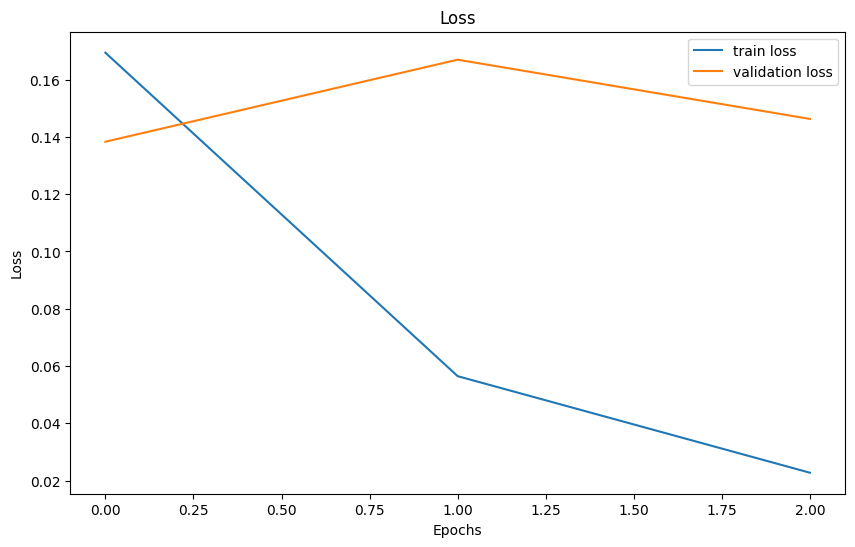

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history['train_loss'], label='train loss')
plt.plot(history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
def get_predictions(model, data_loader):
    model = model.eval()
    text = []
    predictions = []
    prediction_probs = []
    real_values = []

    with torch.no_grad():
        for d in data_loader:
            texts = d['text']
            input_ids = d['input_ids'].to(device)
            attention_mask = d['attention_mask'].to(device)
            targets = d['label'].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            _, preds = torch.max(outputs, dim=1)
            probabilities = nn.functional.softmax(outputs, dim=1)

            text.extend(texts)
            predictions.extend(preds)
            prediction_probs.extend(probabilities)
            real_values.extend(targets)

    predictions = torch.stack(predictions).cpu()
    prediction_probs = torch.stack(prediction_probs).cpu()
    real_values = torch.stack(real_values).cpu()
    return text, predictions, prediction_probs, real_values

In [ ]:
y_text, y_pred, y_pred_probs, y_test = get_predictions(model, test_data_loader)

Рассмотрим Confusion матрицу по предсказаниям нашей модели.

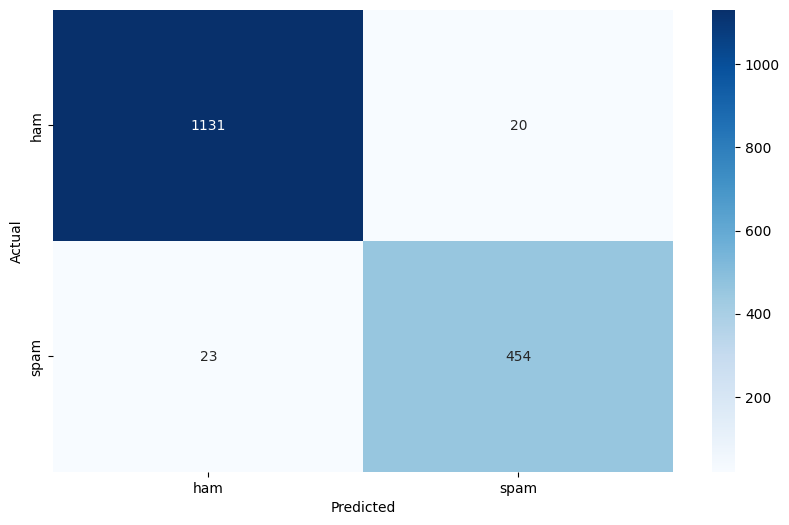

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def create_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cm = pd.DataFrame(cm, index=['ham', 'spam'], columns=['ham', 'spam'])
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

create_confusion_matrix(y_test, y_pred)

Рассмотрим репорт.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

              precision    recall  f1-score   support

         ham       0.98      0.98      0.98      1151
        spam       0.96      0.95      0.95       477

    accuracy                           0.97      1628
   macro avg       0.97      0.97      0.97      1628
weighted avg       0.97      0.97      0.97      1628



Трансформерная модель BERT, благодаря своей высокой эффективности, оказалась превосходящей по производительности традиционные классификаторы машинного обучения. Однако, стоит учитывать, что BERT и её производные требуют значительно больше вычислительных ресурсов и времени на обучение по сравнению с классическими методами, которые также демонстрировали солидные результаты в решении данной задачи. Кроме того, скорость вывода (inference speed) для обученной модели BERT медленнее скорости вывода моделей классического машинного обучения.

Учитывая вышеуказанные факторы, можно сделать вывод, что для построения эффективной модели в сжатые сроки классические методы, такие как ExtraTreesClassifier или RandomForestClassifier, будут представлять собой оптимальные решения. Однако, если главной целью является создание наиболее эффективной модели и доступны соответствующие вычислительные ресурсы, то использование обученной модели BERT будет наиболее предпочтительным вариантом.